In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from datetime import datetime
import tensorflow_addons as tfa
import keras_tuner as kt

2022-03-14 12:17:04.349715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 12:17:04.349738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def exports():   
    # Set CUDA and CUPTI paths  
    os.environ['CUDA_HOME'] = '/usr/local/cuda'
    os.environ['PATH']= '/usr/local/cuda/bin:$PATH'  
    os.environ['CPATH'] = '/usr/local/cuda/include:$CPATH'  
    os.environ['LIBRARY_PATH'] = '/usr/local/cuda/lib64:$LIBRARY_PATH'  
    os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/extras/CUPTI/lib64:$LD_LIBRARY_PATH'  
    os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64:$LD_LIBRARY_PATH'
    os.environ['TF_GPU_THREAD_MODE']='gpu_private'

In [3]:
exports

<function __main__.exports()>

# Load data

In [4]:
cf15= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/cf15.csv', low_memory=False, header=None)
gf25= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/gf25.csv', low_memory=False, header=None)
gf34= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/gf34.csv', low_memory=False, header=None)
gm01= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/gm01.csv', low_memory=False, header=None)
hc10= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/hc10.csv', low_memory=False, header=None)
nc46= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/nc46.csv', low_memory=False, header=None)
nc74= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/nc74.csv', low_memory=False, header=None)
nf11= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/nf11.csv', low_memory=False, header=None)
no22= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/no22.csv', low_memory=False, header=None)
wc16= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wc16.csv', low_memory=False, header=None)
wc41= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wc41.csv', low_memory=False, header=None)
wo27= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo27.csv', low_memory=False, header=None)
wo34= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo34.csv', low_memory=False, header=None)
wo36= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo36.csv', low_memory=False, header=None)
wo37= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo37.csv', low_memory=False, header=None)
wo40= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo40.csv', low_memory=False, header=None)
wo45= pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo45.csv', low_memory=False, header=None)

In [5]:
val_1 = pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/gm01_EarlyMarch.csv', low_memory=False, header=None)
val_2 = pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/wo36_EarlyMarch.csv', low_memory=False, header=None)
val_3 = pd.read_csv('/home/jordan/Documents/DataSets/DimensionData/go22.csv', low_memory=False, header=None)

In [6]:
frames =[cf15, gf25,gm01,nc46, nc74,nf11, wc16, wc41,wo27,wo34, wo36, wo37, wo40, wo45]
frames_2=[val_1, val_2, val_3]
data = pd.concat(frames)
val = pd.concat(frames_2)

# Define data cleaning functions

In [40]:
def snip(data):
    #Snip unwanted characters 

    itime= data.iloc[:,0]
    itime=itime.map(lambda x: str(x[6:]))
    itime=itime.map(lambda x: float(x))
    itime=itime - 1646670000
    day = 24*60*60
    week = day*7
    date=itime
    day_sin= np.sin(itime*(2*np.pi / day))
    day_cos= np.cos(itime*(2*np.pi / day))
    week_sin= np.sin(itime*(2*np.pi / week))
    week_cos= np.cos(itime*(2*np.pi / week))



    interface= data.iloc[:,-14]
    interface=interface.map(lambda x: str(x))
    interface=interface.map(lambda x: str(x[15:]))
    interface=interface.map(lambda x: str(x[:-1]))

    dev_id=data.iloc[:,3]
    dev_id=dev_id.map(lambda x: str(x))    
    dev_id=dev_id.map(lambda x: str(x[7:]))
    dev_id=dev_id.map(lambda x: str(x[:-1]))

    jitter=data.iloc[:, -13]
    jitter=jitter.map(lambda x: str(x))
    jitter=jitter.map(lambda x: str(x[8:]))
    jitter=jitter.map(lambda x: str(x[:-1]))
    jitter=jitter.map(lambda x: float(x))

    latency= data.iloc[:,-12]
    latency=latency.map(lambda x: str(x))
    latency=latency.map(lambda x: str(x[9:]))
    latency=latency.map(lambda x: str(x[:-1]))
    latency=latency.map(lambda x: float(x))

    inband= data.iloc[:,-15]
    inband=inband.map(lambda x: str(x))
    inband=inband.map(lambda x: str(x[22:]))
    inband=inband.map(lambda x: str(x[:-5]))
    inband=inband.map(lambda x: float(x))

    outband= data.iloc[:, -5]
    outband=outband.map(lambda x: str(x))
    outband=outband.map(lambda x: x.split('"')[1])
    outband=outband.map(lambda x: str(x[:-4]))
    outband=outband.map(lambda x: float(x))

    packet=data.iloc[:,-4]
    packet=packet.map(lambda x: str(x))
    packet=packet.map(lambda x: str(x[12:]))
    packet=packet.map(lambda x: str(x[:-2]))
    packet=packet.map(lambda x: float(x))

    status=data.iloc[:,-2]
    status=status.map(lambda x: str(x))
    status=status.map(lambda x: str(x[8:]))
    status=status.map(lambda x: str(x[:-1]))

    status[:] = np.where(status=="up", 1,0)
    status=status.map(lambda x: float(x))
    status=status.rolling(10).mean()
    status=status.map(np.floor)

    train_init=pd.concat([itime, day_sin, day_cos, week_sin, week_cos, interface, dev_id, inband, outband, latency, packet, jitter, status], axis=1)
    train_init.columns=['Time','Day Sin', 'Day Cos','Week Sin','Week Cos', 'Interface', 'Dev_id', 'Inband', 'Outband', 'Latency', 'Packet', 'Jitter', 'Status']

    #Dedupp based on interfaces
    train=train_init[train_init.Interface != 'NI2A-WWW1']
    train=train[train.Interface != 'NI2B-WWW1']
    train=train[train.Interface != 'NI2A-WWW2']
    train=train[train.Interface != 'NI2B-WWW2']
    train=train[train.Interface != 'NI2A-WWW3']    
    train=train[train.Interface != 'NI2B-WWW3']
    train=train[train.Interface != 'NI2A-MPLS']
    train['Interface']= train['Interface'].astype('category')
    train['Interface']=train['Interface'].cat.codes

    #Remove unwanted columns
    train_label=train.filter(['Status'])
    train=train.drop(['Status','Inband', 'Outband'], axis=1)
    train= train.sort_values(by=['Dev_id', 'Time'])
    train=train.reset_index(drop=True)
    train=train.drop(['Dev_id','Time'], axis=1)

    return train, train_label

In [41]:
train,train_label=snip(data)
train=train.iloc[:-700, :]
#train=train.to_numpy()
train_label=train_label.iloc[700:]

In [42]:
test,test_label=snip(val)
test=test.iloc[:-700, :]
#test=test.to_numpy()
test_label=test_label.iloc[700:]

In [43]:
#train, train_label = preproccess(data)
mean=train.mean()
std = train.std()
train-=mean
train/=std
#test, test_label = preproccess(val)
test-=mean
test/=std

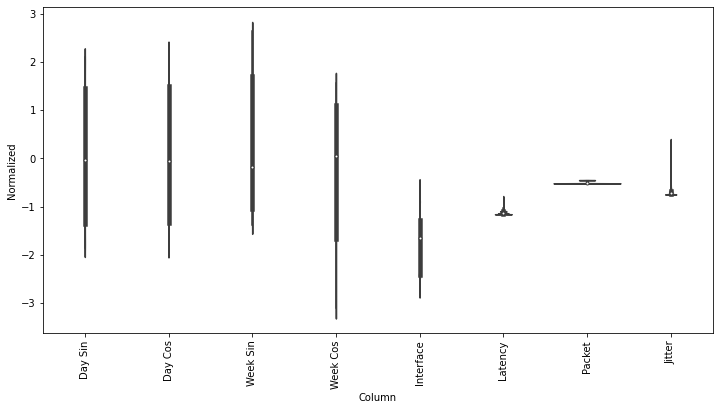

In [45]:
df_std = (train - mean) / std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train.keys(), rotation=90)

In [46]:
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

2022-03-14 12:48:45.690134: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-03-14 12:48:45.690163: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-03-14 12:48:45.719114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-14 12:48:45.719894: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [47]:
def get_model(hp):
    model=tf.keras.Sequential()
    #Tune number of layers
    for i in range(hp.Int("num_layers", 1, 4)):
        model.add(
            tf.keras.layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=16, max_value=240, step=32),
                activation=hp.Choice('activation',['elu','relu','tanh'])
            )
        )
        if hp.Boolean("dropout"):
            model.add(tf.keras.layers.Dropout(rate=hp.Choice('rate',[0.3,0.4,0.45,0.5])))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='BinaryCrossentropy',
                metrics=tfa.metrics.F1Score(num_classes=1, average='micro'))
    
    return model


In [48]:
tuner = kt.Hyperband(get_model,
                     objective=kt.Objective("val_f1_score", direction="max"),
                     max_epochs=10,
                     factor=3,
                     hyperband_iterations=1,
                     directory='/home/jordan/Documents/DataSets/Data-Science/Time test',
                     project_name='time_test')

2022-03-14 12:49:32.790071: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-14 12:49:32.790123: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-03-14 12:49:32.792719: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [51]:
tuner.search(train, train_label, epochs=50, validation_split=0.2,
callbacks= [callback])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 31 Complete [00h 04m 48s]
val_f1_score: 0.11395494639873505

Best val_f1_score So Far: 0.7057667374610901
Total elapsed time: 01h 11m 53s
INFO:tensorflow:Oracle triggered exit


In [52]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train, train_label, epochs=20, validation_split=0.2)

Epoch 1/20
17259/17259 [==============================] - 43s 2ms/step - loss: 6.7260 - f1_score: 0.4736 - val_loss: 6.0287 - val_f1_score: 0.6492
Epoch 2/20
17259/17259 [==============================] - 37s 2ms/step - loss: 6.3353 - f1_score: 0.5839 - val_loss: 6.0969 - val_f1_score: 0.6614
Epoch 3/20
17259/17259 [==============================] - 37s 2ms/step - loss: 6.1511 - f1_score: 0.5945 - val_loss: 6.5519 - val_f1_score: 0.6354
Epoch 4/20
17259/17259 [==============================] - 37s 2ms/step - loss: 5.9159 - f1_score: 0.6008 - val_loss: 6.2880 - val_f1_score: 0.6624
Epoch 5/20
17259/17259 [==============================] - 38s 2ms/step - loss: 5.7463 - f1_score: 0.6187 - val_loss: 6.1273 - val_f1_score: 0.6774
Epoch 6/20
17259/17259 [==============================] - 39s 2ms/step - loss: 5.6347 - f1_score: 0.6295 - val_loss: 6.6223 - val_f1_score: 0.7002
Epoch 7/20
17259/17259 [==============================] - 40s 2ms/step - loss: 5.5649 - f1_score: 0.6341 - val_loss: 6

In [53]:
val_acc_per_epoch = history.history["val_f1_score"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 20


In [54]:
hypermodel = tuner.hypermodel.build(best_hps)

#Retrain the model
hypermodel.fit(train, train_label, epochs=best_epoch, validation_split=0.2)

Epoch 1/20
17259/17259 [==============================] - 34s 2ms/step - loss: 6.8332 - f1_score: 0.4747 - val_loss: 7.4804 - val_f1_score: 0.5939
Epoch 2/20
17259/17259 [==============================] - 32s 2ms/step - loss: 6.5350 - f1_score: 0.5714 - val_loss: 6.8271 - val_f1_score: 0.6223
Epoch 3/20
17259/17259 [==============================] - 32s 2ms/step - loss: 6.2643 - f1_score: 0.5905 - val_loss: 5.9886 - val_f1_score: 0.6678
Epoch 4/20
17259/17259 [==============================] - 32s 2ms/step - loss: 6.0353 - f1_score: 0.6071 - val_loss: 6.7471 - val_f1_score: 0.6415
Epoch 5/20
17259/17259 [==============================] - 32s 2ms/step - loss: 5.8515 - f1_score: 0.6140 - val_loss: 6.9451 - val_f1_score: 0.6671
Epoch 6/20
17259/17259 [==============================] - 32s 2ms/step - loss: 5.7248 - f1_score: 0.6172 - val_loss: 6.5710 - val_f1_score: 0.6861
Epoch 7/20
17259/17259 [==============================] - 32s 2ms/step - loss: 5.6502 - f1_score: 0.6273 - val_loss: 6

In [55]:
eval_result = hypermodel.evaluate(test, test_label)
print("[test loss, test accuracy]:", eval_result)

2910/2910 [==============================] - 5s 2ms/step - loss: 5.7134 - f1_score: 0.8552
[test loss, test accuracy]: [5.713435173034668, 0.8552290797233582]


In [21]:
hypermodel.save('tuned_model5.h5')

In [56]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 112)               1008      
                                                                 
 dropout_2 (Dropout)         (None, 112)               0         
                                                                 
 dense_4 (Dense)             (None, 112)               12656     
                                                                 
 dropout_3 (Dropout)         (None, 112)               0         
                                                                 
Total params: 13,664
Trainable params: 13,664
Non-trainable params: 0
_________________________________________________________________
